## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

RANDOM_SEED = 1000
np.random.seed(RANDOM_SEED) 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

## Loading Datasets

In [2]:
# Load monday dataset and display the first three rows
data_monday = pd.read_csv("../Data/csv/enp0s3-monday.pcap_Flow.csv")
data_monday.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 PM,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,328678.885476,1124015.0,5.0,4307335.0,430733.50,4.710773e+05,1124629.0,161.0,4308182.0,215409.10,391464.261335,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 PM,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,24748.568006,50854.0,40.0,51364.0,25682.00,3.601436e+04,51148.0,216.0,102319.0,25579.75,29333.976596,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 PM,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,999658.398851,3285675.0,187001.0,119204338.0,1354594.75,1.000961e+06,3285675.0,187001.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Benign


In [3]:
# Load tuesday dataset and display the first three rows
data_tuesday = pd.read_csv("../Data/csv/enp0s3-public-tuesday.pcap_Flow.csv")
data_tuesday.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,16/07/2019 11:59:02 AM,116171923,86,1,24936.0,289.0,296.0,288.0,289.953488,2.453842,289.0,289.0,289.000000,0.000000,217.135082,0.748890,1.350836e+06,1.040791e+06,4505426.0,130148.0,111683795.0,1.313927e+06,9.887308e+05,4505426.0,130148.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,688,8,0.740282,0.008608,288.0,296.0,289.931818,2.429680,5.903344,0,0,0,0,0,0,0,0,0.0,293.264368,289.953488,289.000000,0,0,0,0,0,0,86,24936,1,289,-1,-1,86,0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,BENIGN
1,192.168.3.10-239.2.11.71-53569-8662-17,192.168.3.10,53569,239.2.11.71,8662,17,16/07/2019 11:59:09 AM,119738502,31,1,1572.0,52.0,56.0,48.0,50.709677,2.397131,52.0,52.0,52.000000,0.000000,13.562889,0.267249,3.862532e+06,6.759608e+06,20016015.0,6.0,118231910.0,3.941064e+06,6.860767e+06,20016015.0,6.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,248,8,0.258898,0.008352,48.0,56.0,50.787879,2.341975,5.484848,0,0,0,0,0,0,0,0,0.0,52.375000,50.709677,52.000000,0,0,0,0,0,0,31,1572,1,52,-1,-1,31,0,3244690.75,2.304140e+06,5448741.0,64.0,1.525138e+07,5.298373e+06,20016015.0,7732663.0,BENIGN,BENIGN
2,192.168.3.29-35.164.43.181-44100-443-6,192.168.3.29,44100,35.164.43.181,443,6,16/07/2019 11:59:47 AM,79615889,8,6,152.0,136.0,39.0,0.0,19.000000,20.354010,35.0,0.0,22.666667,17.625739,3.617368,0.175844,6.124299e+06,1.465600e+07,43093543.0,51.0,79615782.0,1.137368e+07,1.899788e+07,43093543.0,680.0,79615838.0,15923167.6,2.125863e+07,43177351.0,1396.0,0,1,0,0,256,192,0.100482,0.075362,0.0,39.0,21.266667,18.128378,328.638095,0,0,0,1,1,0,0,0,0.0,22.785714,19.000000,22.666667,0,0,0,0,0,0,8,152,6,136,-1,118,4,0,84656.50,7.983236e+02,85221.0,84092.0,3.890854e+07,5.918482e+06,43093543.0,34723545.0,BENIGN,BENIGN


In [4]:
# Load wednesday dataset and display the first three rows
data_wednesday = pd.read_csv("../Data/csv/enp0s3-public-wednesday.pcap_Flow.csv")
data_wednesday.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.29-23.219.38.49-55438-80-6,192.168.3.29,55438,23.219.38.49,80,6,17/07/2019 02:35:09 PM,13621707,2,3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.367061,3.405427e+06,4.812397e+06,10224310.0,15786.0,3381611.0,3.381611e+06,0.000000e+00,3381611.0,3381611.0,10255969.0,5.127984e+06,7.229740e+06,10240183.0,15786.0,0,0,0,0,64,96,0.146824,0.220237,0.0,0.0,0.00,0.000000,0.00,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,3,0,-1,294,0,0,15786.0,0.0,15786.0,15786.0,10224310.0,0.0,10224310.0,10224310.0,Normal,Benign
1,192.168.3.29-52.32.232.251-43846-443-6,192.168.3.29,43846,52.32.232.251,443,6,17/07/2019 02:33:27 PM,42843,1,2,0.0,74.0,0.0,0.0,0.000000,0.000000,39.0,35.0,37.000000,2.828427,1727.236655,70.023108,2.142150e+04,3.023659e+04,42802.0,41.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,42802.0,4.280200e+04,0.000000e+00,42802.0,42802.0,0,1,0,0,32,64,23.341036,46.682072,0.0,39.0,28.25,18.927493,358.25,0,0,0,1,1,0,0,0,2.0,37.666667,0.000000,37.000000,0,0,0,0,0,0,1,0,2,74,-1,118,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Benign
2,192.168.3.29-23.52.177.21-48386-443-6,192.168.3.29,48386,23.52.177.21,443,6,17/07/2019 02:35:41 PM,40215051,34,38,1319.0,154463.0,604.0,0.0,38.794118,117.385864,13032.0,0.0,4064.815789,3923.311624,3873.723796,1.790374,5.664092e+05,4.739208e+06,39937006.0,9.0,40201818.0,1.218237e+06,6.950749e+06,39937058.0,35.0,40215051.0,1.086893e+06,6.572657e+06,39986014.0,19.0,0,0,0,0,1088,1232,0.845455,0.944920,0.0,13032.0,2134.00,3467.004363,12020119.25,0,1,0,0,0,0,0,0,1.0,2163.638889,38.794118,4064.815789,0,0,0,0,0,0,34,1319,38,154463,-1,264,6,0,277958.0,0.0,277958.0,277958.0,39937006.0,0.0,39937006.0,39937006.0,Normal,Benign


In [5]:
# Load thursday dataset and display the first three rows
data_thursday = pd.read_csv("../Data/csv/enp0s3-public-thursday.pcap_Flow.csv")
data_thursday.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.10-239.2.11.71-53569-8662-17,192.168.3.10,53569,239.2.11.71,8662,17,18/07/2019 11:35:02 AM,113222432,23,1,1176.0,52.0,56.0,48.0,51.130435,2.398946,52.0,52.0,52.000000,0.000000,10.845907,0.211972,4.922714e+06,8.193137e+06,20014257.0,2.0,93208175.0,4.236735e+06,7.680208e+06,20006653.0,2.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,184,8,0.203140,0.008832,48.0,56.0,51.200000,2.309401,5.333333e+00,0,0,0,0,0,0,0,0,0.0,53.333333,51.130435,52.000000,0,0,0,0,0,0,23,1176,1,52,-1,-1,23,0,1.931052e+06,2.587620e+06,3760776.0,101329.0,1.822672e+07,2.629474e+06,20014257.0,13189541.0,Normal,Benign
1,192.168.3.29-192.168.3.31-34788-9200-6,192.168.3.29,34788,192.168.3.31,9200,6,18/07/2019 11:35:02 AM,118474833,48,34,69034.0,9024.0,4485.0,0.0,1438.208333,1466.509852,2822.0,0.0,265.411765,488.587024,658.857228,0.692130,1.462652e+06,3.485767e+06,15012298.0,6.0,118468307.0,2.520602e+06,4.290347e+06,15012298.0,22.0,118474813.0,3.590146e+06,4.748011e+06,15018850.0,6.0,0,1,0,0,1536,1088,0.405149,0.286981,0.0,4485.0,974.457831,1305.654488,1.704734e+06,0,0,0,1,1,0,0,0,0.0,986.341463,1438.208333,265.411765,0,0,0,0,0,0,48,69034,34,9024,-1,6751,31,0,8.551451e+05,2.135556e+06,7055567.0,5767.0,9.010065e+06,3.605382e+06,15012298.0,7013172.0,Normal,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,18/07/2019 11:36:57 AM,119822741,248,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.078070,4.831562e+05,4.014908e+05,2216725.0,9.0,118822871.0,4.810643e+05,4.009493e+05,2216725.0,9.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,2.069724,0.008346,0.0,0.0,0.000000,0.000000,0.000000e+00,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,248,0,1,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Normal,Benign


In [6]:
# Load friday dataset and display the first three rows
data_friday = pd.read_csv("../Data/csv/enp0s3-tcpdump-friday.pcap_Flow.csv")
data_friday.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,0.87.248.248-3.0.0.0-0-0-0,0.87.248.248,0,3.0.0.0,0,0,19/07/2019 12:35:58 PM,60006116,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.033330,6.000612e+07,0.000000e+00,60006116.0,60006116.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,0.016665,0.016665,0.0,0.0,0.000000,0.000000,0.000000e+00,0,0,0,0,0,0,0,0,1.0,0.0,0.000000,0.00,0,0,0,0,0,0,1,0,1,0,-1,-1,0,0,0.0,0.0000,0.0,0.0,60006116.0,0.000000e+00,60006116.0,60006116.0,Normal,Benign
1,192.168.3.29-91.189.92.19-33566-443-6,192.168.3.29,33566,91.189.92.19,443,6,19/07/2019 12:37:13 PM,50787024,31,32,1724.0,181480.0,1208.0,0.0,55.612903,220.256317,20272.0,0.0,5671.25,5454.269568,3607.299376,1.240474,8.191455e+05,4.534406e+06,30283506.0,8.0,50657871.0,1688595.7,6.473488e+06,30283506.0,67.0,50787024.0,1.638291e+06,6.378157e+06,30412449.0,58.0,0,0,0,0,992,1040,0.610392,0.630082,0.0,20272.0,2862.562500,4761.881654,2.267552e+07,0,1,0,0,0,0,0,0,1.0,2908.0,55.612903,5671.25,0,0,0,0,0,0,31,1724,32,181480,-1,273,4,0,522747.5,556942.0496,916565.0,128930.0,24870728.5,7.654823e+06,30283506.0,19457951.0,Normal,Benign
2,192.168.3.29-91.189.92.19-33566-443-6,192.168.3.29,33566,91.189.92.19,443,6,19/07/2019 12:38:04 PM,91,1,1,0.0,31.0,0.0,0.0,0.000000,0.000000,31.0,31.0,31.00,0.000000,340659.340659,21978.021978,9.100000e+01,0.000000e+00,91.0,91.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,0,0,32,32,10989.010989,10989.010989,0.0,31.0,20.666667,17.897858,3.203333e+02,0,0,0,1,1,0,0,0,1.0,31.0,0.000000,31.00,0,0,0,0,0,0,1,0,1,31,-1,2273,0,0,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Normal,Benign


## EDA & Data Preprocessing

In [7]:
# Check the shape of each datasets
data_monday.shape, data_tuesday.shape, data_wednesday.shape, data_thursday.shape, data_friday.shape

((8728, 85), (29242, 85), (17487, 85), (9685, 85), (7361, 85))

In [8]:
# Combine all datasets to make one datasets (weekly datasets)
data_frames = [data_monday, data_tuesday, data_wednesday, data_thursday, data_friday]
data = pd.concat(data_frames, axis=0)
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 PM,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,3.286789e+05,1124015.0,5.0,4307335.0,4.307335e+05,4.710773e+05,1124629.0,161.0,4308182.0,2.154091e+05,3.914643e+05,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 PM,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,2.474857e+04,50854.0,40.0,51364.0,2.568200e+04,3.601436e+04,51148.0,216.0,102319.0,2.557975e+04,2.933398e+04,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 PM,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,9.996584e+05,3285675.0,187001.0,119204338.0,1.354595e+06,1.000961e+06,3285675.0,187001.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 PM,119999065,248,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.075016,4.838672e+05,2.691121e+05,1000382.0,5822.0,118999045.0,4.817775e+05,2.676347e+05,1000382.0,5822.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,2.066683,0.008333,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,248,0,1,0,-1,-1,0,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 PM,110289343,19,16,1184.0,2216.0,296.0,0.0,62.315789,123.980757,384.0,0.0,138.500000,185.827877,30.828001,0.317347,3.243804e+06,4.596748e+06,10224606.0,26.0,110256187.0,6.125344e+06,4.740791e+06,10240187.0,16158.0,110289343.0,7.352623e+06,4.205301e+06,10240205.0,17550.0,0,1,0,0,608,512,0.172274,0.145073,0.0,384.0,102.666667,158.881807,25243.428571,0,0,0,1,1,0,0,0,0.0,105.600000,62

In [9]:
# Check shape of combined datasets to see if the columns is equal to the previous datasets before combining
data.shape

(72503, 85)

In [10]:
# Change the Timestamp column from object into datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [11]:
# Extract "Timestamp" and "Stage" feature colums from the dataframe. 
df = data[['Timestamp', 'Stage']]

In [12]:
# Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72503 entries, 0 to 7360
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  72503 non-null  datetime64[ns]
 1   Stage      72503 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ MB


In [13]:
# Check datasets data types if is object, integer and float
data.dtypes

Flow ID                               object
Src IP                                object
Src Port                               int64
Dst IP                                object
Dst Port                               int64
Protocol                               int64
Timestamp                     datetime64[ns]
Flow Duration                          int64
Total Fwd Packet                       int64
Total Bwd packets                      int64
Total Length of Fwd Packet           float64
Total Length of Bwd Packet           float64
Fwd Packet Length Max                float64
Fwd Packet Length Min                float64
Fwd Packet Length Mean               float64
Fwd Packet Length Std                float64
Bwd Packet Length Max                float64
Bwd Packet Length Min                float64
Bwd Packet Length Mean               float64
Bwd Packet Length Std                float64
Flow Bytes/s                         float64
Flow Packets/s                       float64
Flow IAT M

In [14]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,2019-07-15 13:45:37,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,3.286789e+05,1124015.0,5.0,4307335.0,4.307335e+05,4.710773e+05,1124629.0,161.0,4308182.0,2.154091e+05,3.914643e+05,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,2019-07-15 13:47:19,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,2.474857e+04,50854.0,40.0,51364.0,2.568200e+04,3.601436e+04,51148.0,216.0,102319.0,2.557975e+04,2.933398e+04,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2019-07-15 13:45:38,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,9.996584e+05,3285675.0,187001.0,119204338.0,1.354595e+06,1.000961e+06,3285675.0,187001.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2019-07-15 13:45:38,119999065,248,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.075016,4.838672e+05,2.691121e+05,1000382.0,5822.0,118999045.0,4.817775e+05,2.676347e+05,1000382.0,5822.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,2.066683,0.008333,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,248,0,1,0,-1,-1,0,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,Normal,Benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,2019-07-15 13:45:39,110289343,19,16,1184.0,2216.0,296.0,0.0,62.315789,123.980757,384.0,0.0,138.500000,185.827877,30.828001,0.317347,3.243804e+06,4.596748e+06,10224606.0,26.0,110256187.0,6.125344e+06,4.740791e+06,10240187.0,16158.0,110289343.0,7.352623e+06,4.205301e+06,10240205.0,17550.0,0,1,0,0,608,512,0.172274,0.145073,0.0,384.0,102.666667,158.881807,25243.428571,0,0,0,1,1,0,0,0,0.0,105.600000,62.315789,138.500

In [15]:
# Check the statistical distribution of datasets
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Src Port,72503.0,41068.450878,0.0,37502.0,47518.0,53348.0,65475.0,18019.591769
Dst Port,72503.0,8076.99629,0.0,53.0,443.0,9002.0,65432.0,14182.94066
Protocol,72503.0,9.367709,0.0,6.0,6.0,17.0,17.0,5.384638
Timestamp,72503,2019-07-17 09:51:39.837220608,2019-07-15 13:45:37,2019-07-16 13:59:46,2019-07-16 20:33:16,2019-07-17 21:26:38.500000,2019-07-19 22:28:33,NaN
Flow Duration,72503.0,15073688.091238,4.0,416.0,14758.0,294755.5,119999997.0,36621258.776882
Total Fwd Packet,72503.0,26.970774,0.0,1.0,1.0,5.0,58261.0,302.583074
Total Bwd packets,72503.0,28.68353,1.0,2.0,3.0,5.0,101496.0,654.787127
Total Length of Fwd Packet,72503.0,22613.294581,0.0,0.0,45.0,293.0,253467291.0,2028420.589389
Total Length of Bwd Packet,72503.0,42731.958222,0.0,0.0,228.0,499.0,95483154.0,759262.835521
Fwd Packet Length Max,72503.0,196.43103,0.0,0.0,45.0,120.0,64440.0,942.777182


In [16]:
# Count the unique values of Activity column in a dataset
data["Activity"].value_counts()

Activity
Normal                    35006
BENIGN                    16842
Directory Bruteforce       9968
Network Scan               7740
Web Vulnerability Scan     2574
Account Bruteforce          141
Account Discovery           136
SQL Injection                55
Backdoor                     20
Command Injection            12
CSRF                          7
Malware Download              2
Name: count, dtype: int64

In [17]:
# Count the unique values of Stage column in a dataset
data["Stage"].value_counts()

Stage
Benign                35006
BENIGN                16842
Reconnaissance        11909
Establish Foothold     8600
Lateral Movement        137
Data Exfiltration         9
Name: count, dtype: int64

In [18]:
# Function to group the data into their corresponding Activity & Remove redudancy
def Activity(Activity):
    if Activity in [
        'Normal', 'BENIGN'
    ]:
        return 'BENIGN'
    elif Activity in [
        'Network Scan'
    ]:
        return 'Network Scan'
    elif Activity in [
        'Directory Bruteforce'
    ]:
        return 'Directory Bruteforce'
    elif Activity in [
        'Web Vulnerability Scan'
    ]:
        return 'Web Vulnerability Scan'
    elif Activity in [
        'Account Bruteforce'
    ]:
        return 'Account Bruteforce'
    elif Activity in [
        'Account Discovery'
    ]:
        return 'Account Discovery'
    elif Activity in [
        'SQL Injection'
    ]:
        return 'SQL Injection'
    elif Activity in [
        'Backdoor'
    ]:
        return 'Backdoor'
    elif Activity in [
        'Command Injection'
    ]:
        return 'Command Injection'
    elif Activity in [
        'CSRF'
    ]:
        return 'CSRF'
    elif Activity in [
        'Malware Download'
    ]:
        return 'Malware Download'
    else:
        return 'Others'
data['Activity'] = data['Activity'].apply(Activity)

In [19]:
# Function to group the data into their corresponding Stage & Remove redudancy
def Stages(Stage):
    if Stage in [
        'Benign', 'BENIGN'
    ]:
        return 'BENIGN'
    elif Stage in [
        'Reconnaissance'
    ]:
        return 'Reconnaissance'
    elif Stage in [
        'Establish Foothold'
    ]:
        return 'Establish Foothold'
    elif Stage in [
        'Lateral Movement'
    ]:
        return 'Lateral Movement'
    elif Stage in [
        'Data Exfiltration'
    ]:
        return 'Data Exfiltration'
    else:
        return 'Others'
data['Stage'] = data['Stage'].apply(Stages)
df['Stage'] = df['Stage'].apply(Stages)

In [20]:
# Display again the first five rows to check if the process above is successfully as required
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,2019-07-15 13:45:37,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,3.286789e+05,1124015.0,5.0,4307335.0,4.307335e+05,4.710773e+05,1124629.0,161.0,4308182.0,2.154091e+05,3.914643e+05,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN,BENIGN
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,2019-07-15 13:47:19,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,2.474857e+04,50854.0,40.0,51364.0,2.568200e+04,3.601436e+04,51148.0,216.0,102319.0,2.557975e+04,2.933398e+04,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN,BENIGN
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,2019-07-15 13:45:38,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,9.996584e+05,3285675.0,187001.0,119204338.0,1.354595e+06,1.000961e+06,3285675.0,187001.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN,BENIGN
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2019-07-15 13:45:38,119999065,248,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.075016,4.838672e+05,2.691121e+05,1000382.0,5822.0,118999045.0,4.817775e+05,2.676347e+05,1000382.0,5822.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,2.066683,0.008333,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,248,0,1,0,-1,-1,0,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,BENIGN,BENIGN
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,2019-07-15 13:45:39,110289343,19,16,1184.0,2216.0,296.0,0.0,62.315789,123.980757,384.0,0.0,138.500000,185.827877,30.828001,0.317347,3.243804e+06,4.596748e+06,10224606.0,26.0,110256187.0,6.125344e+06,4.740791e+06,10240187.0,16158.0,110289343.0,7.352623e+06,4.205301e+06,10240205.0,17550.0,0,1,0,0,608,512,0.172274,0.145073,0.0,384.0,102.666667,158.881807,25243.428571,0,0,0,1,1,0,0,0,0.0,105.600000,62.315789,138.500

In [21]:
df.head()

,Timestamp,Stage
0,2019-07-15 13:45:37,BENIGN
1,2019-07-15 13:47:19,BENIGN
2,2019-07-15 13:45:38,BENIGN
3,2019-07-15 13:45:38,BENIGN
4,2019-07-15 13:45:39,BENIGN


In [22]:
# Check again the distribution of unique values from Activity column to see if eaqual as the previous one
data["Activity"].value_counts()

Activity
BENIGN                    51848
Directory Bruteforce       9968
Network Scan               7740
Web Vulnerability Scan     2574
Account Bruteforce          141
Account Discovery           136
SQL Injection                55
Backdoor                     20
Command Injection            12
CSRF                          7
Malware Download              2
Name: count, dtype: int64

In [23]:
# Check again the distribution of unique values from Stage column to see if eaqual as the previous one
data["Stage"].value_counts()

Stage
BENIGN                51848
Reconnaissance        11909
Establish Foothold     8600
Lateral Movement        137
Data Exfiltration         9
Name: count, dtype: int64

In [24]:
df['Stage'].value_counts()

Stage
BENIGN                51848
Reconnaissance        11909
Establish Foothold     8600
Lateral Movement        137
Data Exfiltration         9
Name: count, dtype: int64

In [25]:
# function to display and check for columns with null values
def checkForNull(df):
    colList=df.columns
    for col in colList:
        nullCount=pd.isnull(df[col]).sum()
        if(nullCount!=0):
            print("{}-->{}".format(col,nullCount))

In [26]:
# Apply the function defined above to check for columns with null values
checkForNull(data)

In [27]:
# Identify and display categorical columns
cat_cols = ['Flow ID', 'Src IP', 'Dst IP']
for col in cat_cols:
    print(col, data[col].nunique(), data[col].unique())

Flow ID 36690 ['192.168.3.1-192.168.3.29-54587-22-6'
 '192.168.3.29-35.224.99.156-33388-80-6'
 '255.255.255.255-0.0.0.0-67-68-17' ...
 '192.168.3.29-206.207.50.50-47957-8194-6'
 '192.168.3.29-206.207.50.50-47957-6543-6'
 '192.168.3.29-8.8.8.8-39836-53-17']
Src IP 697 ['192.168.3.29' '0.0.0.0' '8.6.0.1' '192.168.3.10' '0.87.248.248'
 '192.168.3.1' '72.201.228.135' '38.27.100.197' '192.30.253.112'
 '140.82.114.4' '216.58.217.202' '23.35.177.137' '172.217.5.202'
 '192.168.3.31' '23.59.65.137' '35.244.179.255' '162.243.128.177'
 '192.168.3.30' '209.17.97.26' '23.53.253.160' '184.98.36.245'
 '113.206.179.120' '54.244.236.44' '172.217.14.100' '54.186.163.246'
 '108.128.247.43' '52.26.103.165' '172.217.14.101' '172.217.5.65'
 '172.217.11.163' '172.217.14.110' '13.224.51.59' '172.217.4.138'
 '172.217.5.74' '216.58.193.206' '13.224.55.60' '172.217.11.78'
 '91.189.89.224' '172.217.4.174' '172.217.4.161' '172.217.11.69'
 '172.217.4.131' '172.217.14.67' '172.217.5.206' '172.217.11.173'
 '151.101.0

In [28]:
# Encode categorical columns into their corresponding numbers using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head(3)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,5742,282,22,281,54587,6,2019-07-15 13:45:37,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,328678.885476,1124015.0,5.0,4307335.0,430733.50,4.710773e+05,1124629.0,161.0,4308182.0,215409.10,391464.261335,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,BENIGN
1,20755,282,33388,473,80,6,2019-07-15 13:47:19,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,24748.568006,50854.0,40.0,51364.0,25682.00,3.601436e+04,51148.0,216.0,102319.0,25579.75,29333.976596,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,BENIGN
2,36688,0,68,416,67,17,2019-07-15 13:45:38,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,999658.398851,3285675.0,187001.0,119204338.0,1354594.75,1.000961e+06,3285675.0,187001.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,BENIGN


In [29]:
# Check and display again if null values exist in our datasets
checkForNull(data)

In [30]:
# Mapping Activity column from categorical into their corresponding number
activity_encode = {
    'BENIGN': 0, 
    'Network Scan': 1, 
    'Directory Bruteforce': 2,
    'Web Vulnerability Scan': 3,
    'Account Bruteforce': 4,
    'Account Discovery': 5,
    'SQL Injection': 6,
    'Backdoor': 7,
    'Command Injection': 8,
    'CSRF': 10,
    'Malware Download': 11
}

data['Activity'] = data['Activity'].map(activity_encode)

In [31]:
# Check again the distribution of unique values
data["Activity"].value_counts()

Activity
0     51848
2      9968
1      7740
3      2574
4       141
5       136
6        55
7        20
8        12
10        7
11        2
Name: count, dtype: int64

In [32]:
# Mapping Stage column from categorical into their corresponding number
stage_encode = {
    'BENIGN': 0, 
    'Reconnaissance': 1, 
    'Establish Foothold': 2, 
    'Lateral Movement': 3, 
    'Data Exfiltration': 4
}

data['Stage'] = data['Stage'].map(stage_encode)
df['Stage'] = df['Stage'].map(stage_encode)

In [33]:
# Check again the distribution of unique values
data["Stage"].value_counts()

Stage
0    51848
1    11909
2     8600
3      137
4        9
Name: count, dtype: int64

In [34]:
df['Stage'].value_counts()

Stage
0    51848
1    11909
2     8600
3      137
4        9
Name: count, dtype: int64

In [35]:
# Check and display again if null values exist in our datasets
checkForNull(data)

In [36]:
checkForNull(df)

## Save the processed datasets

In [37]:
 data.to_csv("../Data/csv/processed_apt_datasets.csv", index=False)

In [38]:
df.to_csv("../Data/csv/Time_series_data.csv", index=False)

In [39]:
# Load the datasets to check if saved successfully
df = pd.read_csv('../Data/csv/processed_apt_datasets.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,5742,282,22,281,54587,6,2019-07-15 13:45:37,4308182,11,21,728.0,408.0,192.0,0.0,66.181818,54.972390,72.0,0.0,19.428571,24.076070,263.684310,7.427727,1.389736e+05,3.286789e+05,1124015.0,5.0,4307335.0,4.307335e+05,4.710773e+05,1124629.0,161.0,4308182.0,2.154091e+05,3.914643e+05,1124015.0,5.0,0,1,0,0,352,672,2.553281,4.874446,0.0,192.0,36.121212,42.573288,1812.484848,0,0,0,1,1,0,0,0,1.0,37.250000,66.181818,19.428571,0,0,0,0,0,0,11,728,21,408,-1,1444,10,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,0
1,20755,282,33388,473,80,6,2019-07-15 13:47:19,102319,3,5,87.0,148.0,87.0,0.0,29.000000,50.229473,148.0,0.0,29.600000,66.187612,2296.738631,78.186847,1.461700e+04,2.474857e+04,50854.0,40.0,51364.0,2.568200e+04,3.601436e+04,51148.0,216.0,102319.0,2.557975e+04,2.933398e+04,51113.0,102.0,0,0,0,0,96,176,29.320068,48.866779,0.0,148.0,26.111111,54.010287,2917.111111,0,1,0,0,0,0,0,0,1.0,29.375000,29.000000,29.600000,0,0,0,0,0,0,3,87,5,148,-1,229,1,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,0
2,36688,0,68,416,67,17,2019-07-15 13:45:38,119674949,89,1,25803.0,289.0,296.0,288.0,289.921348,2.417854,289.0,289.0,289.000000,0.000000,218.023907,0.752037,1.344662e+06,9.996584e+05,3285675.0,187001.0,119204338.0,1.354595e+06,1.000961e+06,3285675.0,187001.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,712,8,0.743681,0.008356,288.0,296.0,289.901099,2.394693,5.734554,0,0,0,0,0,0,0,0,0.0,293.122222,289.921348,289.000000,0,0,0,0,0,0,89,25803,1,289,-1,-1,89,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,0
3,36689,676,0,685,0,0,2019-07-15 13:45:38,119999065,248,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.075016,4.838672e+05,2.691121e+05,1000382.0,5822.0,118999045.0,4.817775e+05,2.676347e+05,1000382.0,5822.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,0,0,2.066683,0.008333,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,248,0,1,0,-1,-1,0,0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0,0
4,20100,282,54312,374,80,6,2019-07-15 13:45:39,110289343,19,16,1184.0,2216.0,296.0,0.0,62.315789,123.980757,384.0,0.0,138.500000,185.827877,30.828001,0.317347,3.243804e+06,4.596748e+06,10224606.0,26.0,110256187.0,6.125344e+06,4.740791e+06,10240187.0,16158.0,110289343.0,7.352623e+06,4.205301e+06,10240205.0,17550.0,0,1,0,0,608,512,0.172274,0.145073,0.0,384.0,102.666667,158.881807,25243.428571,0,0,0,1,1,0,0,0,0.0,105.600000,62.315789,138.500000,0,0,0,0,0,0,19,1184,16,2216,-1,294,4,0,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,0,0


In [40]:
df.shape

(72503, 85)

In [41]:
checkForNull(df)

In [42]:
df.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
72498,23040,282,34825,694,53,17,2019-07-19 19:32:49,16056,1,3,43.0,346.0,43.0,43.0,43.0,0.0,179.0,43.0,115.333333,68.412962,24227.703039,249.128052,5352.000000,7475.691473,13923.0,178.0,0.0,0.0,0.0,0.0,0.0,16056.0,8028.0,8588.518964,14101.0,1955.0,0,0,0,0,8,24,62.282013,186.846039,43.0,179.0,86.4,62.528394,3909.8,0,0,0,0,0,0,0,0,3.0,108.0,43.0,115.333333,0,0,0,0,0,0,1,43,3,346,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
72499,9184,282,47957,313,8194,6,2019-07-19 15:17:50,365,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5479.452055,365.000000,0.000000,365.0,365.0,0.0,0.0,0.0,0.0,0.0,365.0,365.0,0.000000,365.0,365.0,0,0,0,0,0,44,0.000000,5479.452055,0.0,0.0,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,2,0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
72500,9075,282,47957,313,6543,6,2019-07-19 15:16:55,343,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,5830.903790,343.000000,0.000000,343.0,343.0,0.0,0.0,0.0,0.0,0.0,343.0,343.0,0.000000,343.0,343.0,0,0,0,0,0,44,0.000000,5830.903790,0.0,0.0,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,2,0,-1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
72501,29429,282,47218,694,53,17,2019-07-19 17:11:13,14889,1,3,45.0,228.0,45.0,45.0,45.0,0.0,106.0,45.0,76.000000,30.512293,18335.684062,268.654712,4963.000000,7816.978892,13978.0,65.0,0.0,0.0,0.0,0.0,0.0,14889.0,7444.5,9331.688191,14043.0,846.0,0,0,0,0,8,24,67.163678,201.491034,45.0,106.0,63.6,27.455418,753.8,0,0,0,0,0,0,0,0,3.0,79.5,45.0,76.000000,0,0,0,0,0,0,1,45,3,228,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
72502,25601,282,39836,694,53,17,2019-07-19 22:14:26,14116,1,3,45.0,228.0,45.0,45.0,45.0,0.0,106.0,45.0,76.000000,30.512293,19339.756305,283.366393,4705.333333,7929.046874,13861.0,117.0,0.0,0.0,0.0,0.0,0.0,14116.0,7058.0,9786.357852,13978.0,138.0,0,0,0,0,8,24,70.841598,212.524795,45.0,106.0,63.6,27.455418,753.8,0,0,0,0,0,0,0,0,3.0,79.5,45.0,76.000000,0,0,0,0,0,0,1,45,3,228,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


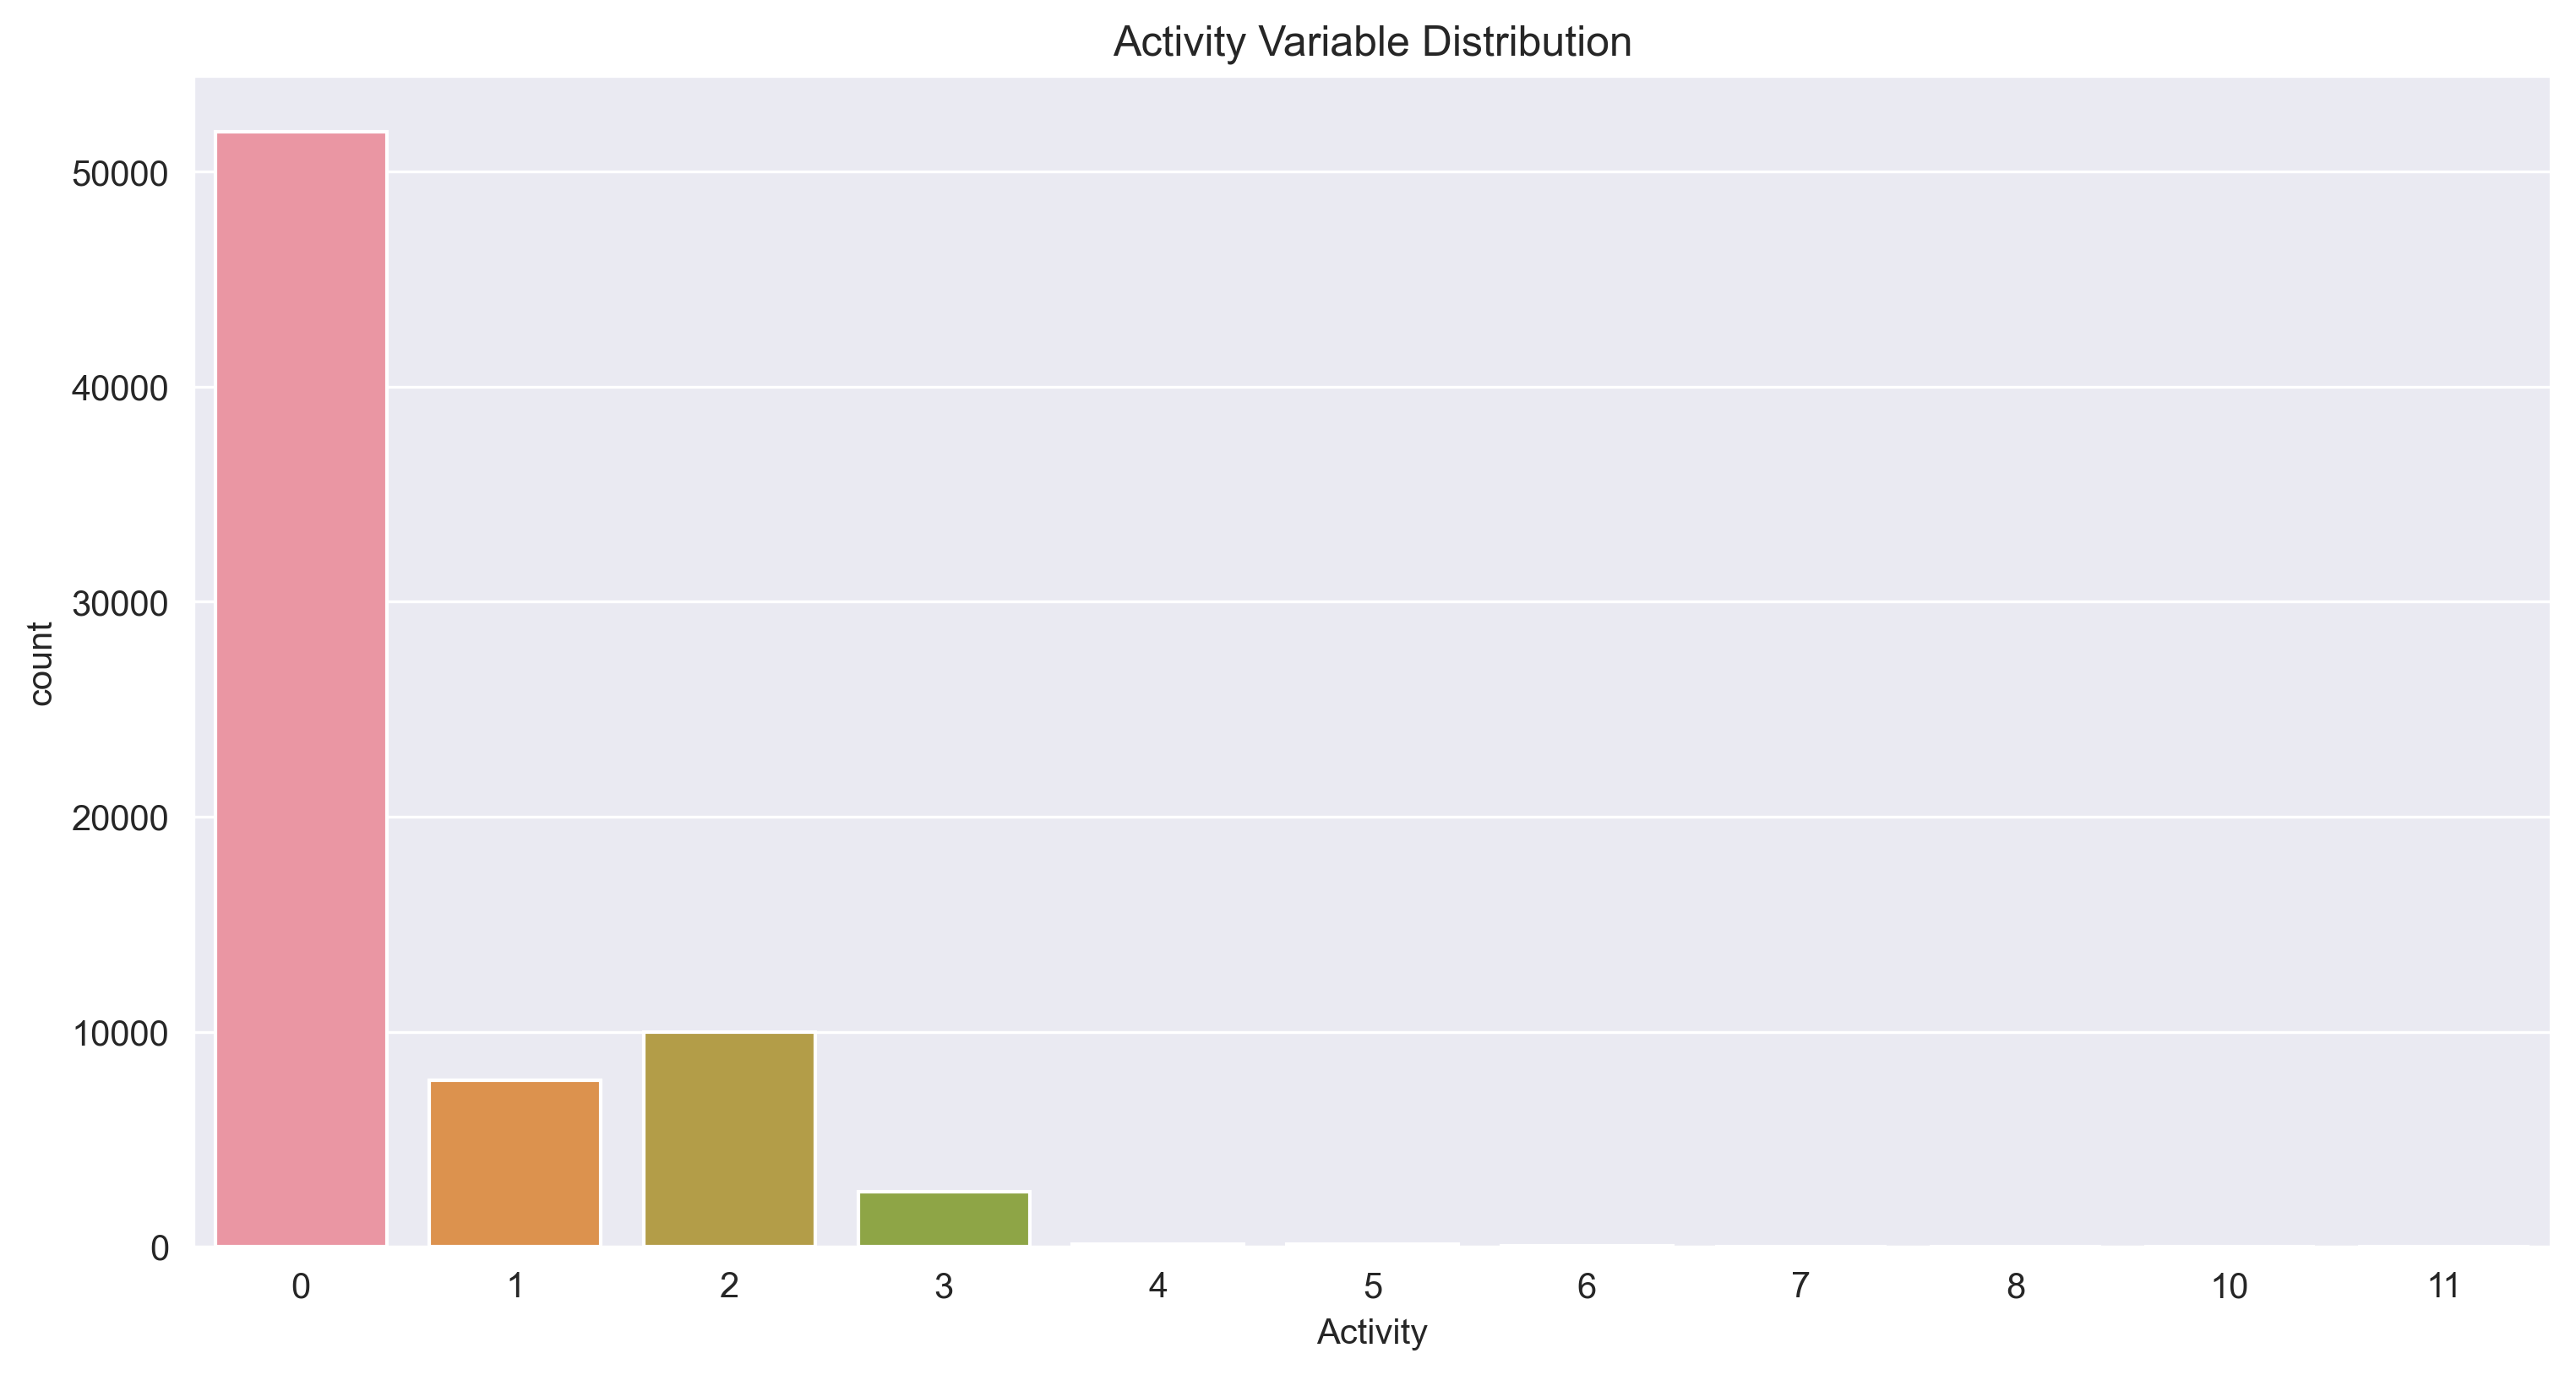

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity', data=df)
plt.title('Activity Variable Distribution')
plt.show()

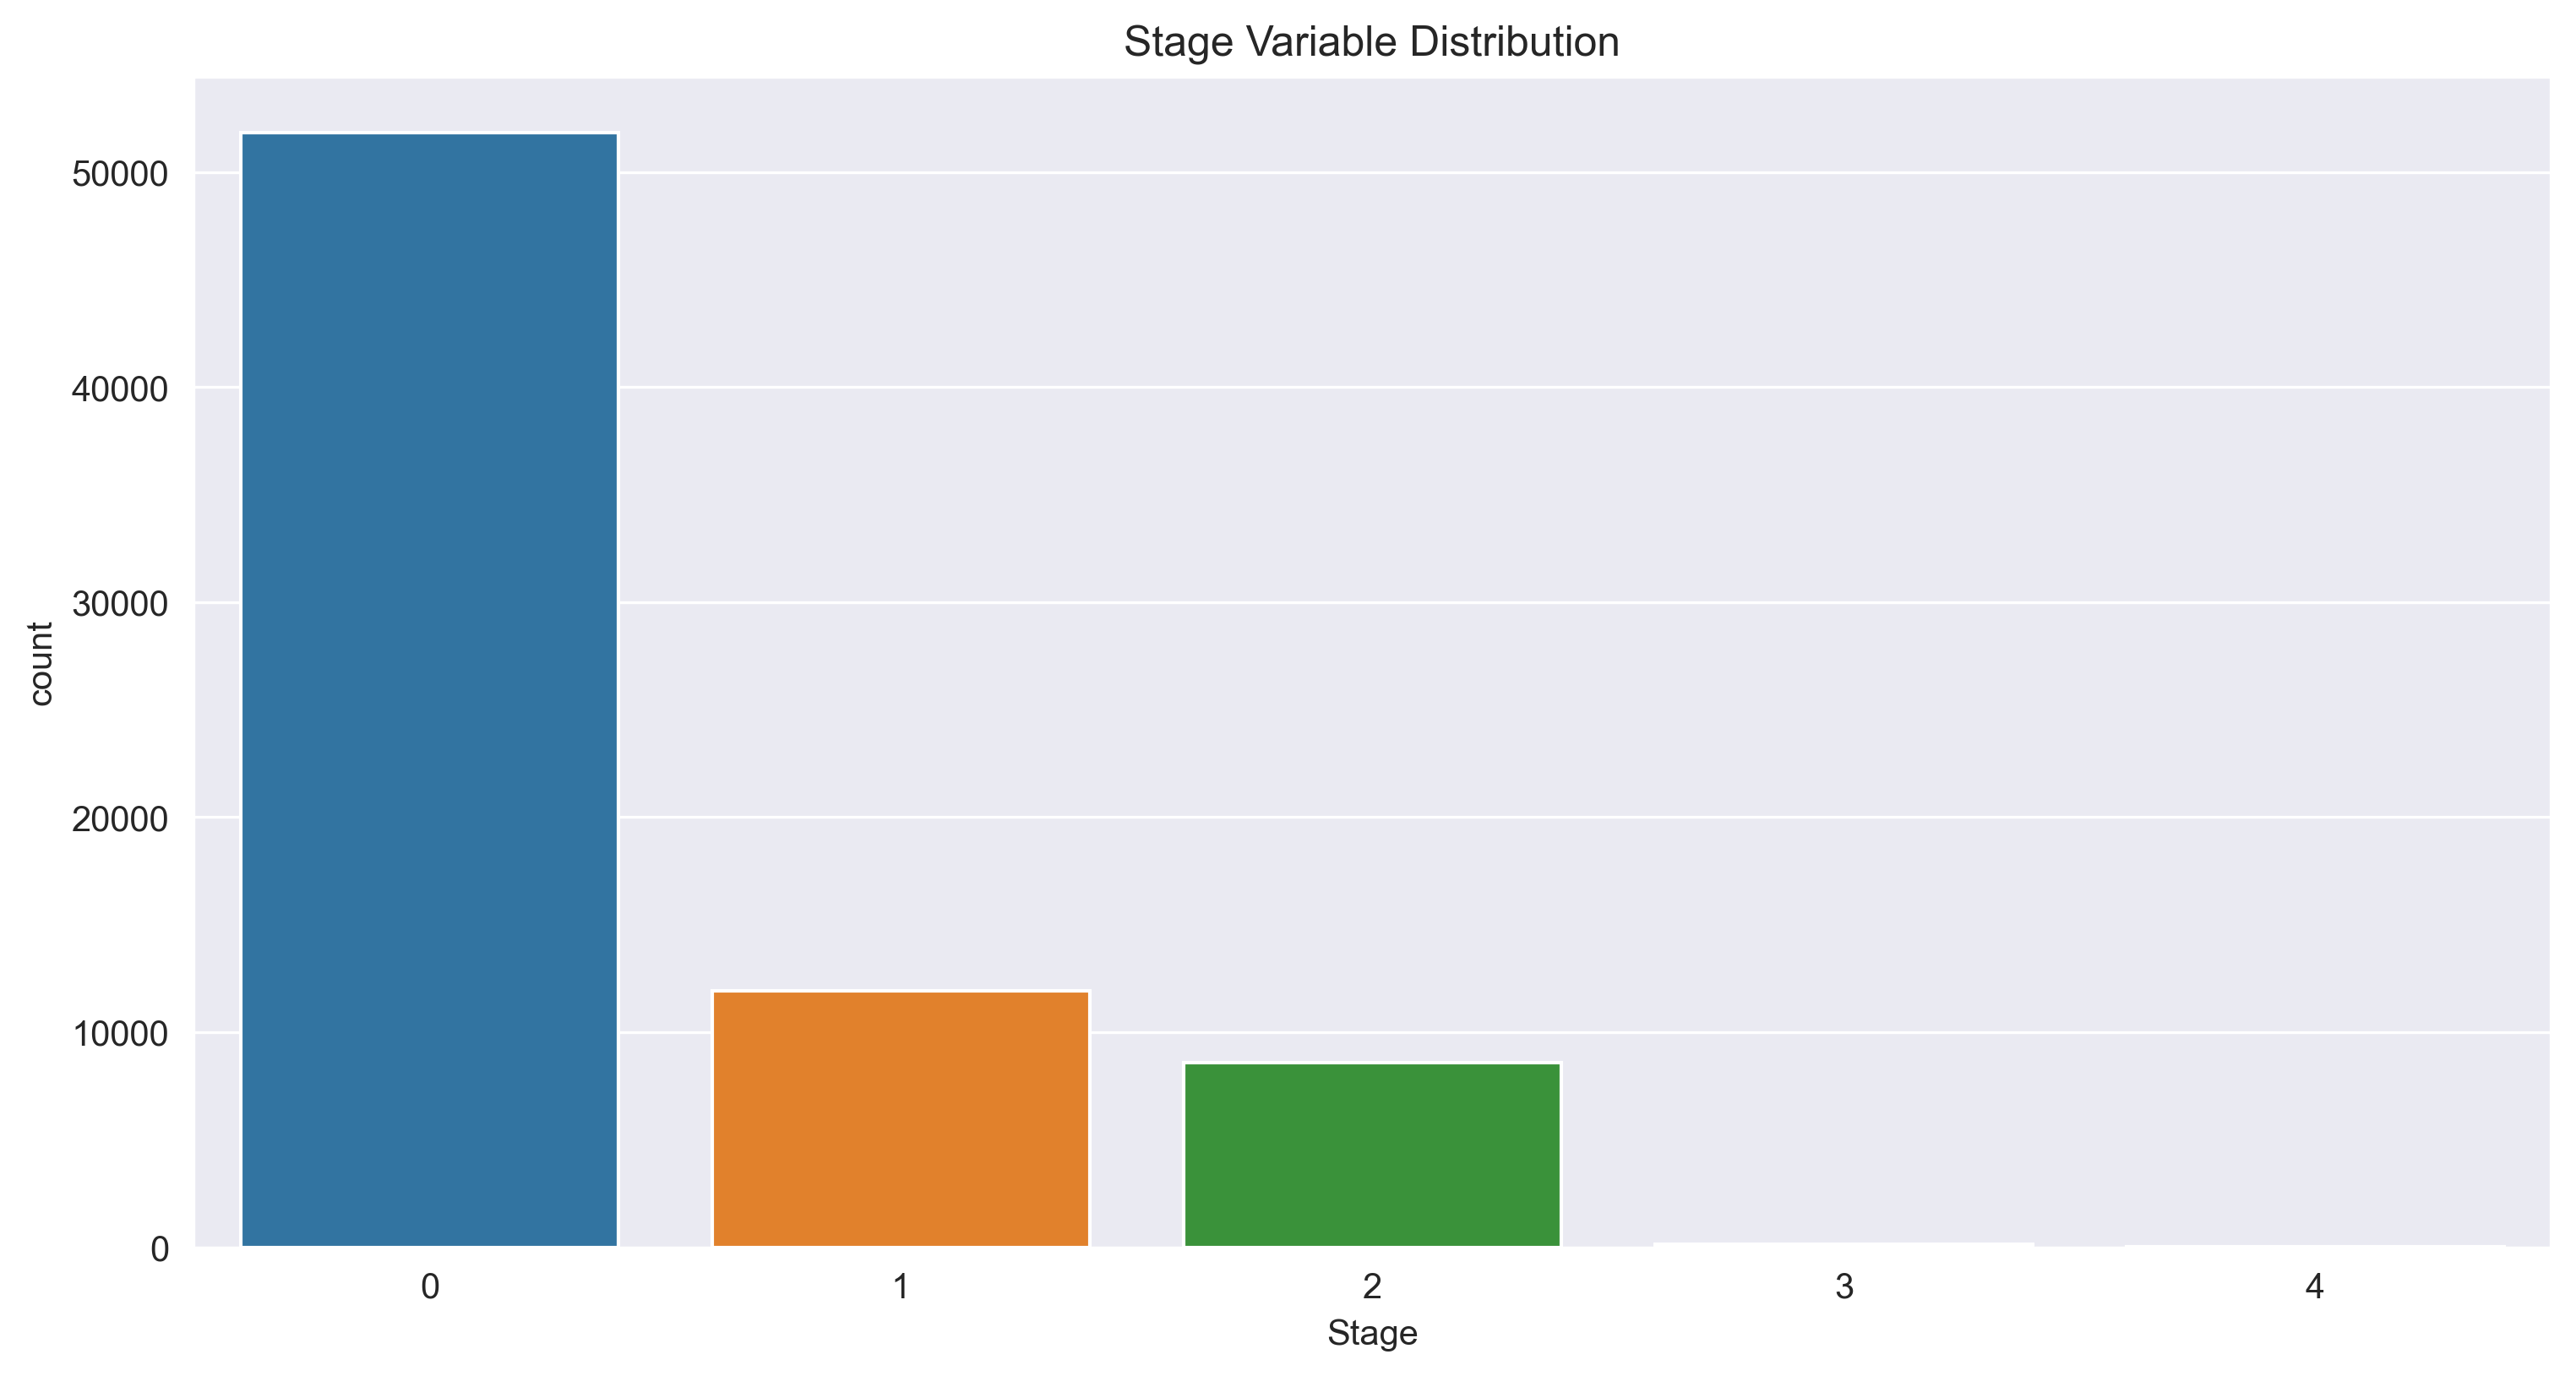

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='Stage', data=df)
plt.title('Stage Variable Distribution')
plt.show()

In [45]:
data = pd.read_csv("../Data/csv/Time_series_data.csv")
data.head()

,Timestamp,Stage
0,2019-07-15 13:45:37,0
1,2019-07-15 13:47:19,0
2,2019-07-15 13:45:38,0
3,2019-07-15 13:45:38,0
4,2019-07-15 13:45:39,0
